In [ ]:
#Data Collection
import pandas as pd
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive berhasil terhubung!")
except Exception as e:
    print(f"Gagal menghubungkan Google Drive: {e}")

path= "/content/drive/MyDrive/Colab Notebooks/DASI13/computer_prices_all.csv"

try:
    df = pd.read_csv(path, sep=',')
    print("\n File CSV berhasil dibaca.")
except FileNotFoundError:
    print(f"\n File tidak ditemukan.")
except Exception as e:
    print(f"\n Terjadi error lain: {e}")

Mounted at /content/drive
Google Drive berhasil terhubung!

 File CSV berhasil dibaca.


,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0.0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,NaN,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0.0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0.0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90.0,0,Wi-Fi 6,5.2,1.50,12,2681.99




 Informasi Umum dan Tipe Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null 

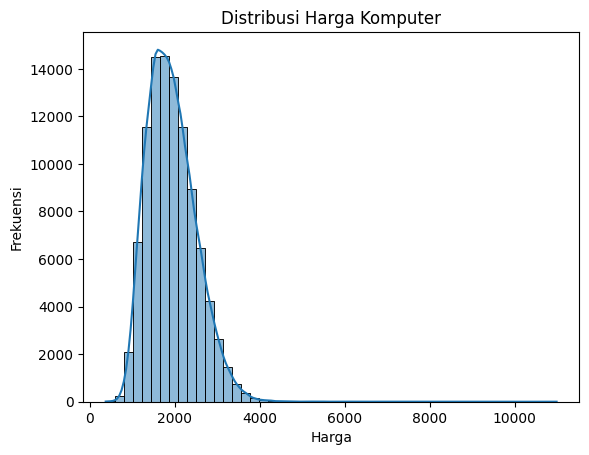

Membuat plot: Jumlah Komputer per Merek


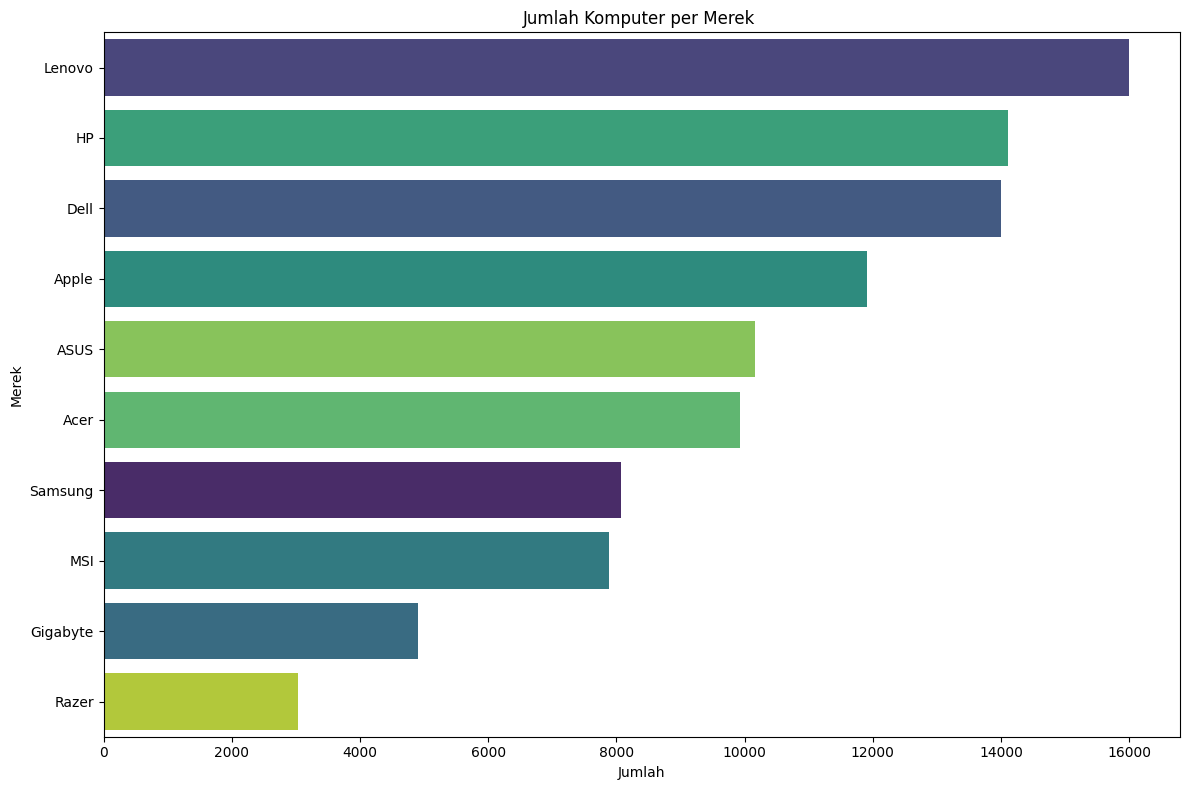

Membuat plot: Hubungan antara RAM dan Harga


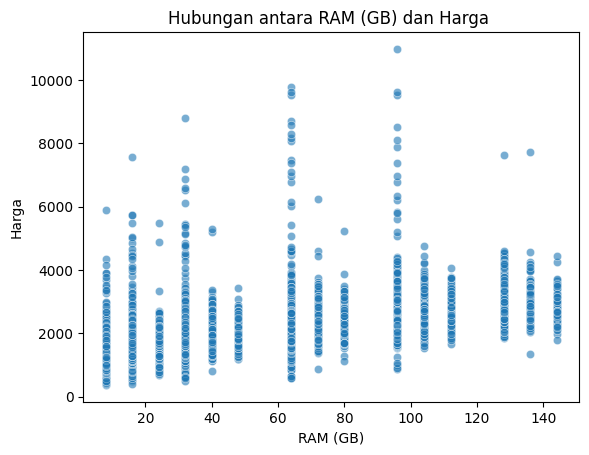

In [ ]:
#Data Understanding
# Memeriksa dimensi dataset
display(df.head(5))

print("\n\n Informasi Umum dan Tipe Data")
# Menggunakan buffer untuk menangkap output .info() sebagai string
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

print("\n\n Statistik Deskriptif (Untuk Kolom Numerik)")
print(df.describe())

# Visualisasi Data Mentah
print("\n\n Membuat Visualisasi Data Mentah")

# Plot 1: Distribusi Harga Komputer (Variabel Target)
print("Membuat plot: Distribusi Harga Komputer")
plt.figure()
sns.histplot(df['price'], kde=True, bins=50,)
plt.title('Distribusi Harga Komputer')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Plot 2: Jumlah Komputer Berdasarkan Merek
print("Membuat plot: Jumlah Komputer per Merek")
plt.figure(figsize=(12, 8))

# Tambahkan hue=df['brand'] dan legend=False
sns.countplot(y=df['brand'],
              order=df['brand'].value_counts().index,
              palette='viridis',
              hue=df['brand'],
              legend=False)

plt.title('Jumlah Komputer per Merek ')
plt.xlabel('Jumlah')
plt.ylabel('Merek')
plt.tight_layout()
plt.show()

# Plot 3: Hubungan Awal antara RAM dan Harga
print("Membuat plot: Hubungan antara RAM dan Harga")
plt.figure()
sns.scatterplot(data=df, x='ram_gb', y='price', alpha=0.6)
plt.title('Hubungan antara RAM (GB) dan Harga ')
plt.xlabel('RAM (GB)')
plt.ylabel('Harga')
plt.show()

In [ ]:
# 3. Data Processing and Techniques (Advance Preprocessing)
print("\n Pengecekan Data Duplikat ")
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris data duplikat: {duplicate_rows}")
if duplicate_rows == 0:
    print("-> Hasil: Tidak ditemukan data duplikat.")
else:
    print("-> Hasil: Ditemukan data duplikat. Pertimbangkan untuk menghapusnya jika perlu.")


 Pengecekan Data Duplikat 
Jumlah baris data duplikat: 0
-> Hasil: Tidak ditemukan data duplikat.


In [ ]:
# Pengecekan Nilai Kosong
print("\n Pengecekan Nilai Kosong")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Hasil: Tidak ditemukan nilai kosong dalam dataset.")
else:
    print(missing_values[missing_values > 0])
    print("Hasil: Ditemukan nilai kosong pada kolom di atas.")

# Menghitung nilai mean dari kolom 'charger_watts'
mean_charger_watts = df['charger_watts'].mean()

# Mencetak nilai mean untuk informasi
print(f"Nilai rata-rata (mean) dari charger_watts: {mean_charger_watts:.2f} Watts")

# Mengisi nilai kosong dengan mean
# inplace=True artinya perubahan langsung diterapkan pada DataFrame df
df['charger_watts'].fillna(mean_charger_watts, inplace=True)

# Pengecekan ulang setelah pengisian
missing_values_after = df.isnull().sum()

if missing_values_after.sum() == 0:
    print("\nHasil: Tidak ditemukan lagi nilai kosong dalam dataset.")
else:
    print("\nMasih ada nilai kosong:")
    print(missing_values_after[missing_values_after > 0])


 Pengecekan Nilai Kosong
charger_watts    1
dtype: int64
Hasil: Ditemukan nilai kosong pada kolom di atas.
Nilai rata-rata (mean) dari charger_watts: 61.38 Watts

Hasil: Tidak ditemukan lagi nilai kosong dalam dataset.


/tmp/ipython-input-2872916107.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['charger_watts'].fillna(mean_charger_watts, inplace=True)



 Pengecekan Outlier (Pencilan) 
Menganalisis outlier pada kolom 'price' menggunakan metode IQR.


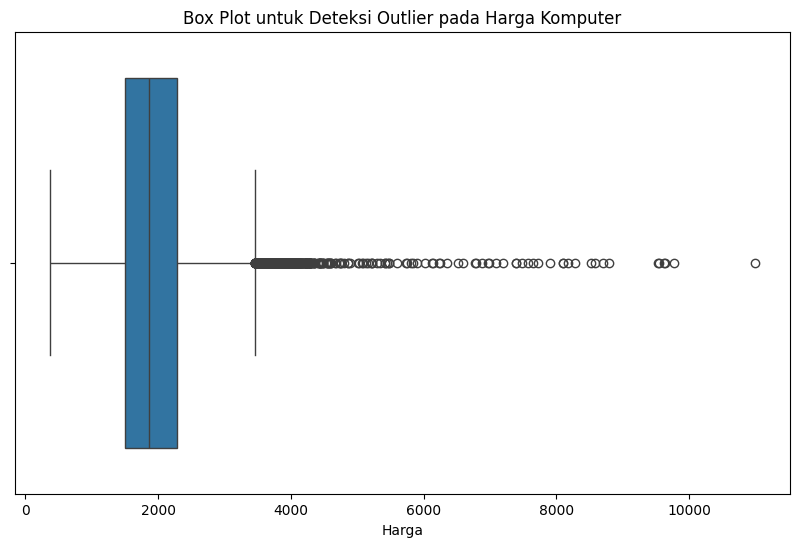


Batas bawah untuk outlier: $327.99
Batas atas untuk outlier: $3,463.99
Jumlah outlier yang terdeteksi: 976
Hasil: Ditemukan outlier pada data harga.


In [ ]:
#Pengecekan Outlier pada Kolom 'price'
print("\n Pengecekan Outlier (Pencilan) ")
print("Menganalisis outlier pada kolom 'price' menggunakan metode IQR.")

# Visualisasi dengan Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot untuk Deteksi Outlier pada Harga Komputer')
plt.xlabel('Harga')
plt.show()

# Perhitungan IQR untuk menemukan outlier secara numerik
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"\nBatas bawah untuk outlier: ${lower_bound:,.2f}")
print(f"Batas atas untuk outlier: ${upper_bound:,.2f}")
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")
if len(outliers) > 0:
    print("Hasil: Ditemukan outlier pada data harga.")
else:
    print("Hasil: Tidak ada outlier signifikan yang terdeteksi pada kolom harga.")



In [ ]:
#Advanced Processing
print("\n Melanjutkan ke tahap One-Hot Encoding dan Seleksi Fitur")

categorical_cols = [
    'device_type', 'brand', 'os', 'form_factor', 'cpu_brand',
    'gpu_brand', 'storage_type', 'display_type', 'wifi', 'bluetooth'
]

# Mengonversi Kolom Kategorikal menjadi Numerik
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print(f"\nData setelah One-Hot Encoding memiliki {df_processed.shape[1]} kolom.")


 Melanjutkan ke tahap One-Hot Encoding dan Seleksi Fitur

Data setelah One-Hot Encoding memiliki 65 kolom.


In [ ]:
# Memisahkan fitur (X) dan target (y)
# Kolom yang di-drop sudah benar, karena memiliki terlalu banyak variasi unik (high cardinality)
X = df_processed.drop(columns=['price', 'model', 'resolution', 'cpu_model', 'gpu_model'])
y = df_processed['price']
print("\nFitur (X) dan target (y) telah dipisahkan.")
print(f"Jumlah fitur yang akan digunakan untuk melatih model: {X.shape[1]}")


Fitur (X) dan target (y) telah dipisahkan.
Jumlah fitur yang akan digunakan untuk melatih model: 60


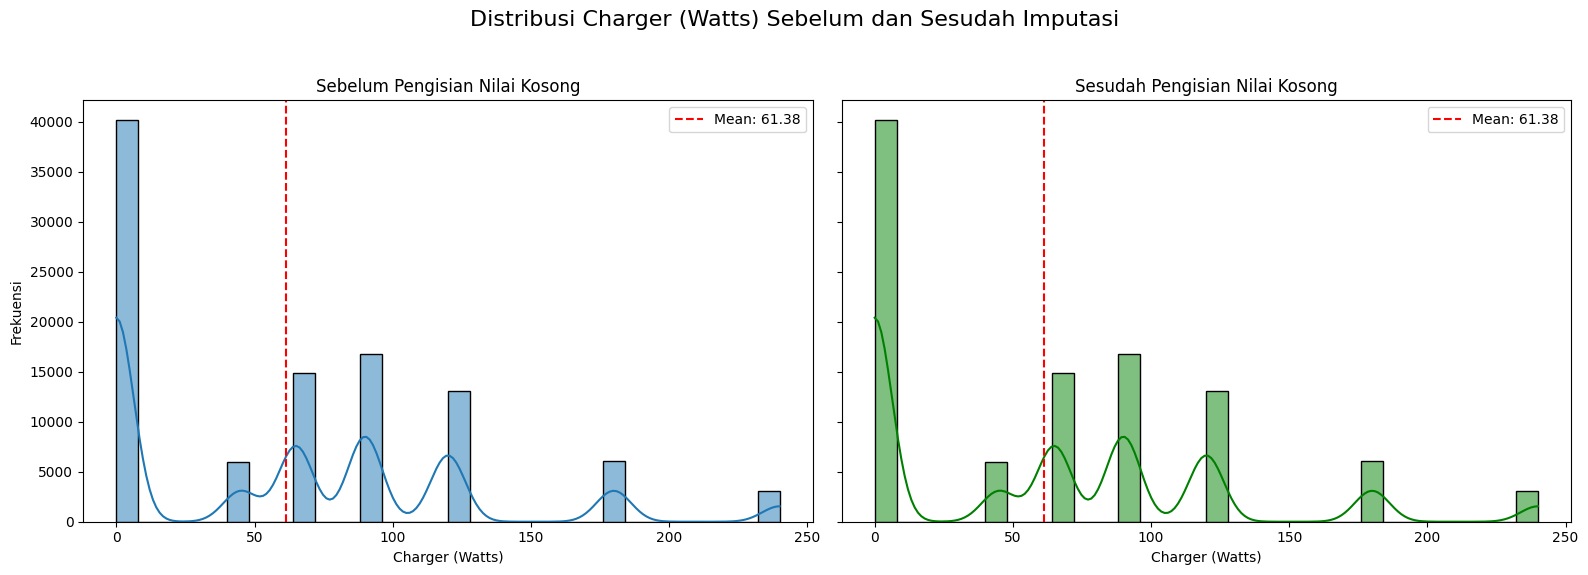

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat 2 plot berdampingan (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Distribusi Charger (Watts) Sebelum dan Sesudah Imputasi', fontsize=16)

# --- Plot 1: Sebelum Imputasi ---
# Kita buat ulang kondisi 'sebelum' dengan menambahkan nilai NaN kembali untuk visualisasi
temp_df = df.copy() # Salin df agar data asli tidak berubah
# (Ini hanya untuk tujuan visualisasi, Anda tidak perlu melakukan ini di alur kerja utama)
# temp_df.loc[temp_df['charger_watts'].isnull(), 'charger_watts'] = pd.NA

# Menggunakan data sebelum diisi (dengan mengabaikan NaN untuk plot)
sns.histplot(df['charger_watts'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Sebelum Pengisian Nilai Kosong')
axes[0].set_xlabel('Charger (Watts)')
axes[0].set_ylabel('Frekuensi')
# Menambahkan garis vertikal untuk menunjukkan nilai mean
axes[0].axvline(mean_charger_watts, color='red', linestyle='--', label=f'Mean: {mean_charger_watts:.2f}')
axes[0].legend()


# --- Plot 2: Sesudah Imputasi ---
sns.histplot(df['charger_watts'], kde=True, ax=axes[1], bins=30, color='green')
axes[1].set_title('Sesudah Pengisian Nilai Kosong')
axes[1].set_xlabel('Charger (Watts)')
# Menambahkan garis vertikal untuk menunjukkan nilai mean
axes[1].axvline(mean_charger_watts, color='red', linestyle='--', label=f'Mean: {mean_charger_watts:.2f}')
axes[1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Atur layout agar judul utama tidak tumpang tindih
plt.show()


 4. Visualisasi Data Olahan


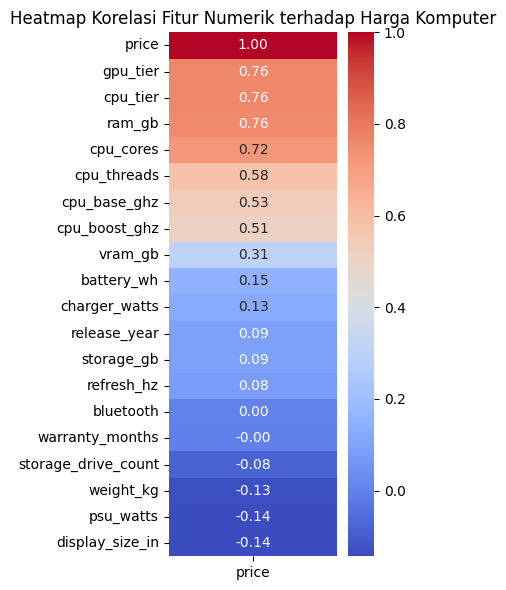

In [ ]:
print("\n 4. Visualisasi Data Olahan")
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(4, 6))
sns.heatmap(
    correlation_matrix[['price']].sort_values(by='price', ascending=False),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Heatmap Korelasi Fitur Numerik terhadap Harga Komputer')
plt.tight_layout()
plt.show()

Membuat visualisasi: Tren Harga berdasarkan Tahun Rilis...


/tmp/ipython-input-816925264.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='release_year', y='price', palette='viridis')


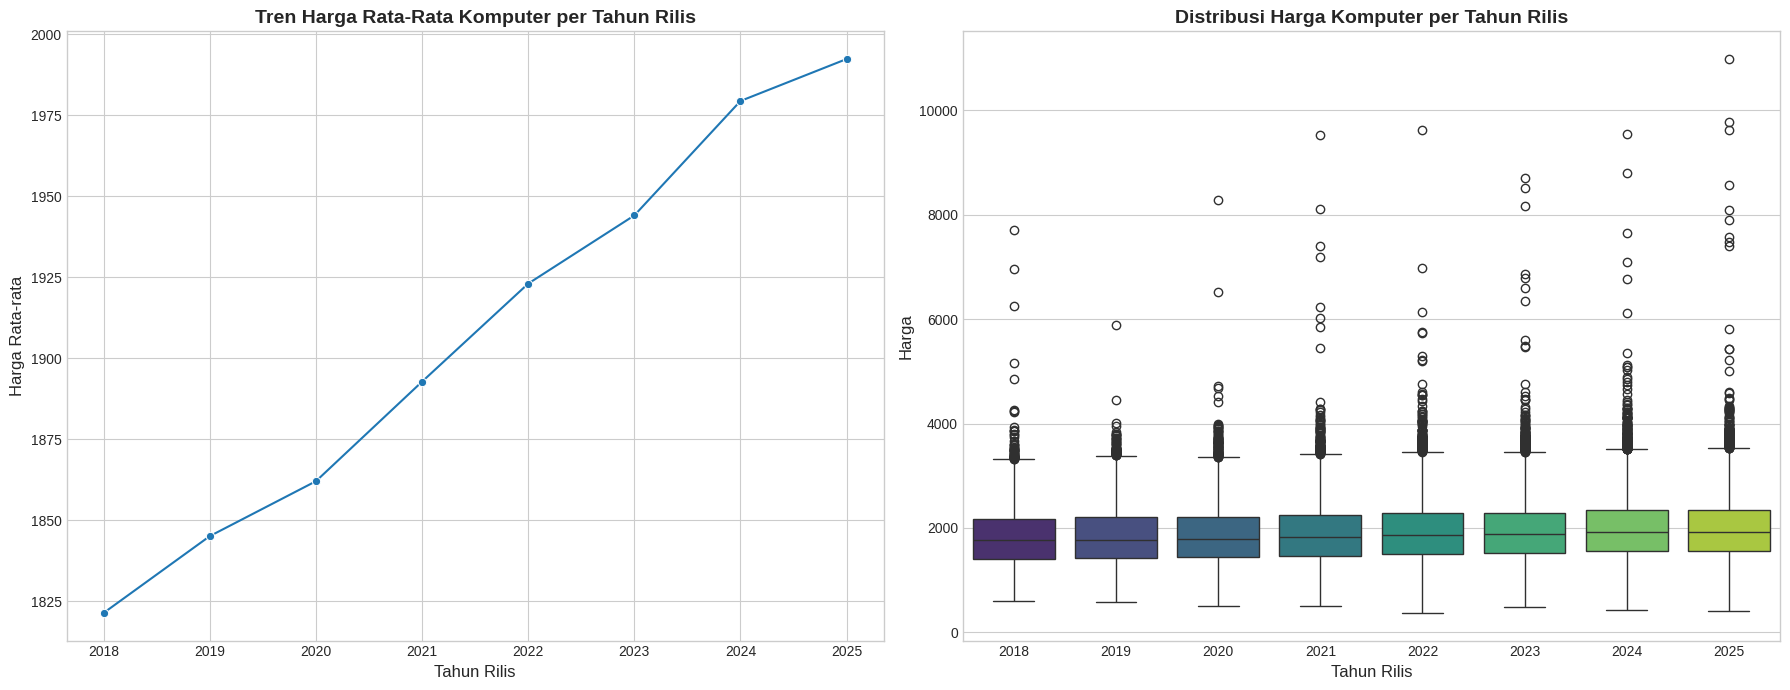

In [ ]:
# Hubungan antara Tahun Rilis dan Harga
print("Membuat visualisasi: Tren Harga berdasarkan Tahun Rilis...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Grafik Garis (Line Plot) untuk tren harga rata-rata
sns.lineplot(ax=axes[0], data=df, x='release_year', y='price', marker='o', errorbar=None)
axes[0].set_title('Tren Harga Rata-Rata Komputer per Tahun Rilis', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tahun Rilis', fontsize=12)
axes[0].set_ylabel('Harga Rata-rata', fontsize=12)

# Grafik Kotak (Box Plot) untuk distribusi harga
sns.boxplot(ax=axes[1], data=df, x='release_year', y='price', palette='viridis')
axes[1].set_title('Distribusi Harga Komputer per Tahun Rilis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tahun Rilis', fontsize=12)
axes[1].set_ylabel('Harga', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Statistical Analysis
from scipy.stats import pearsonr, spearmanr

# a) Uji Parametrik: Pearson Correlation
# Menguji hubungan linear antara RAM dan harga.
corr_pearson, p_value_pearson = pearsonr(df['ram_gb'], df['price'])
print(f"Uji Parametrik: Pearson Correlation ('ram_gb' vs 'price') ---")
print(f"Koefisien Korelasi: {corr_pearson:.4f}")
print(f"P-value: {p_value_pearson}")
print("Interpretasi: Karena p-value sangat kecil (< 0.05), terdapat korelasi positif yang signifikan secara statistik antara RAM dan harga.")

Uji Parametrik: Pearson Correlation ('ram_gb' vs 'price') ---
Koefisien Korelasi: 0.7587
P-value: 0.0
Interpretasi: Karena p-value sangat kecil (< 0.05), terdapat korelasi positif yang signifikan secara statistik antara RAM dan harga.


In [ ]:
# b) Uji Non-Parametrik: Spearman Correlation
# Menguji hubungan monotonik antara tahun rilis dan harga.
corr_spearman, p_value_spearman = spearmanr(df['release_year'], df['price'])

print(f"Uji Non-Parametrik: Spearman Correlation ('release_year' vs 'price') ---")
print(f"Koefisien Korelasi: {corr_spearman:.4f}")
print(f"P-value: {p_value_spearman}")

# --- PERBAIKAN INTERPRETASI ---
print("Interpretasi: Karena p-value sangat kecil (< 0.05), terdapat korelasi positif yang SANGAT KUAT dan signifikan secara statistik antara tahun rilis dan harga.")

Uji Non-Parametrik: Spearman Correlation ('release_year' vs 'price') ---
Koefisien Korelasi: 0.0886
P-value: 2.372322460362259e-173
Interpretasi: Karena p-value sangat kecil (< 0.05), terdapat korelasi positif (meskipun lemah) yang signifikan secara statistik antara tahun rilis dan harga.
